In [2]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


In [3]:
# Loading dataset
dataset = tensorflow.keras.datasets.mnist.load_data()

# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,
# dataset[0][0][0]

In [4]:
# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")
# Each image is of shape 28x28
print('Each Image Shape: ',dataset[0][0][0].shape)
# print("___________________")

There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________


Each Image Shape:  (28, 28)


Randomly printing 10 images with labels from training dataset
index: 58407
Lable: 9


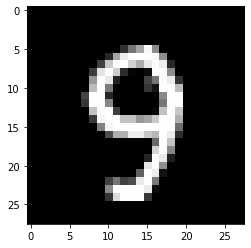

index: 34527
Lable: 5


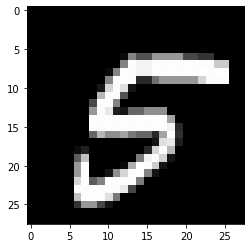

index: 20187
Lable: 6


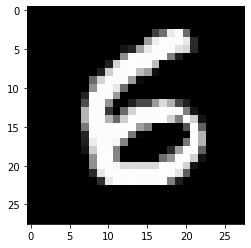

index: 40970
Lable: 4


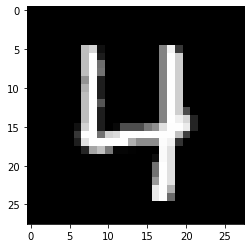

index: 27504
Lable: 6


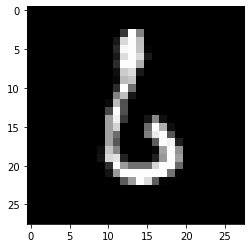

index: 40686
Lable: 2


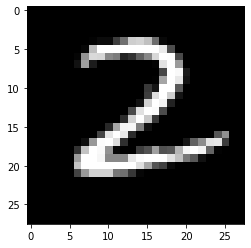

index: 10643
Lable: 4


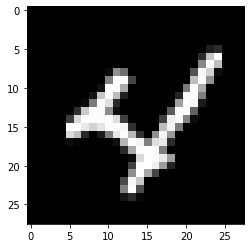

index: 34869
Lable: 1


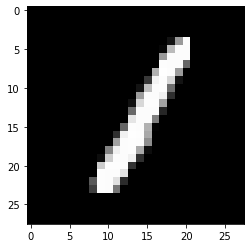

index: 43697
Lable: 6


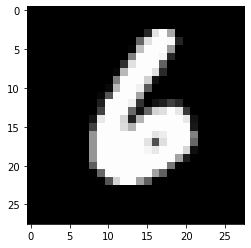

index: 22008
Lable: 0


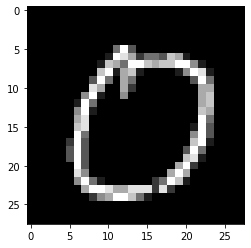

___________________


Randomly printing 10 images with labels from testing dataset
index: 5169
Lable: 4


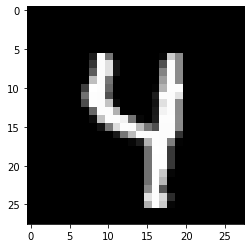

index: 1318
Lable: 1


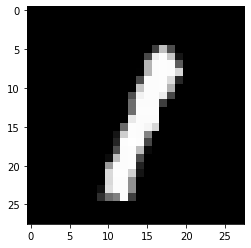

index: 2463
Lable: 7


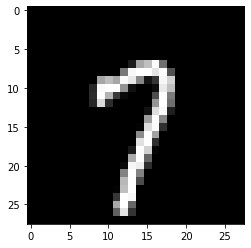

index: 8929
Lable: 0


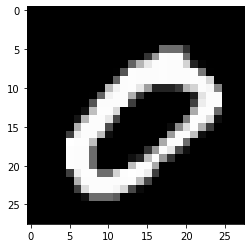

index: 1348
Lable: 2


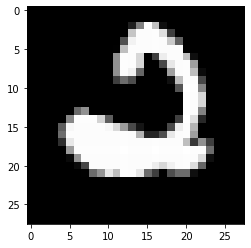

index: 7719
Lable: 3


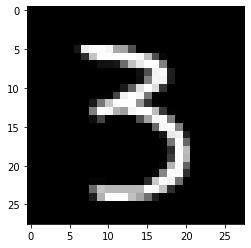

index: 4194
Lable: 4


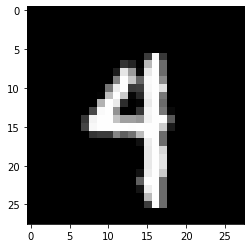

index: 9099
Lable: 4


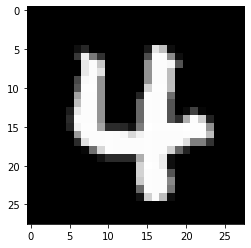

index: 4674
Lable: 1


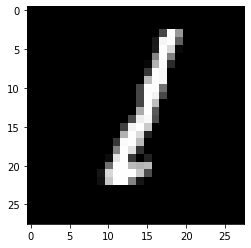

index: 3863
Lable: 5


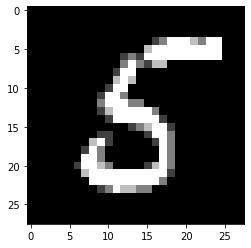

___________________




In [5]:
# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[1])
print("___________________\n\n")

In [6]:
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in testing dataset for 10000 images in testing dataset
___________________




In [7]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [8]:
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [21]:
original_train_images, original_train_labels = dataset[0]
original_test_images, original_test_labels = dataset[1]

# Define the number of samples you want to keep for training and testing
num_samples_train = 6000
num_samples_test = 1000

# Reduce the training dataset while maintaining equal distribution of classes
reduced_train_images = []
reduced_train_labels = []
for digit in range(10):
    digit_indices = np.where(original_train_labels == digit)[0]
    digit_indices = np.random.choice(digit_indices, num_samples_train // 10, replace=False)
    reduced_train_images.extend(original_train_images[digit_indices])
    reduced_train_labels.extend(original_train_labels[digit_indices])

# Convert the lists to numpy arrays
reduced_train_images = np.array(reduced_train_images)
reduced_train_labels = np.array(reduced_train_labels)

# Shuffle the reduced training dataset
shuffle_indices = np.arange(len(reduced_train_images))
np.random.shuffle(shuffle_indices)
reduced_train_images = reduced_train_images[shuffle_indices]
reduced_train_labels = reduced_train_labels[shuffle_indices]

# Print the shapes of the reduced datasets
print("Shape of the reduced training images:", reduced_train_images.shape)
print("Shape of the reduced training labels:", reduced_train_labels.shape)

Shape of the reduced training images: (6000, 28, 28)
Shape of the reduced training labels: (6000,)


In [17]:
# Reduce the testing dataset while maintaining equal distribution of classes
reduced_test_images = []
reduced_test_labels = []
for digit in range(10):
    digit_indices = np.where(original_test_labels == digit)[0]
    digit_indices = np.random.choice(digit_indices, num_samples_test // 10, replace=False)
    reduced_test_images.extend(original_test_images[digit_indices])
    reduced_test_labels.extend(original_test_labels[digit_indices])

# Convert the lists to numpy arrays
reduced_test_images = np.array(reduced_test_images)
reduced_test_labels = np.array(reduced_test_labels)

# Shuffle the reduced testing dataset
shuffle_indices = np.arange(len(reduced_test_images))
np.random.shuffle(shuffle_indices)
reduced_test_images = reduced_test_images[shuffle_indices]
reduced_test_labels = reduced_test_labels[shuffle_indices]

# Print the shapes of the reduced datasets
print("Shape of the reduced testing images:", reduced_test_images.shape)
print("Shape of the reduced testing labels:", reduced_test_labels.shape)

Shape of the reduced testing images: (1000, 28, 28)
Shape of the reduced testing labels: (1000,)


In [14]:
import collections


# Print the distribution of classes in the reduced training dataset
print("Distribution of training dataset:")
print(collections.Counter(reduced_train_labels))

# Print the distribution of classes in the reduced testing dataset
print("\nDistribution of testing dataset:")
print(collections.Counter(reduced_test_labels))

Distribution of training dataset:
Counter({1: 600, 3: 600, 9: 600, 5: 600, 6: 600, 8: 600, 7: 600, 4: 600, 0: 600, 2: 600})

Distribution of testing dataset:
Counter({5: 100, 4: 100, 2: 100, 8: 100, 3: 100, 1: 100, 0: 100, 9: 100, 7: 100, 6: 100})


(28, 28)
___________________
There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({1: 600,
         5: 600,
         3: 600,
         2: 600,
         7: 600,
         0: 600,
         6: 600,
         8: 600,
         4: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({8: 100,
         0: 100,
         7: 100,
         2: 100,
         4: 100,
         9: 100,
         5: 100,
         3: 100,
         1: 100,
         6: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 3732
Lable: 1


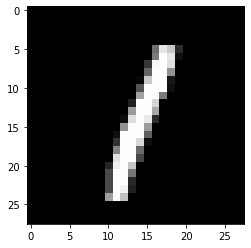

index: 1166
Lable: 8


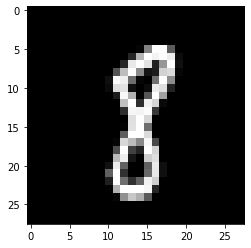

index: 2695
Lable: 5


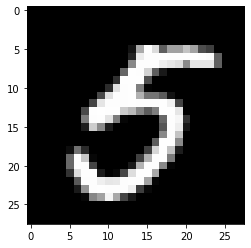

index: 2196
Lable: 1


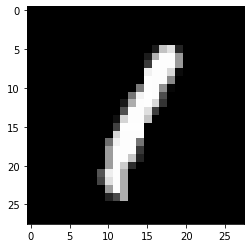

index: 753
Lable: 4


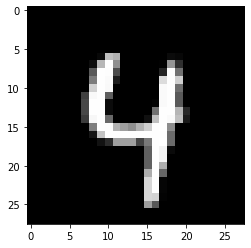

index: 441
Lable: 3


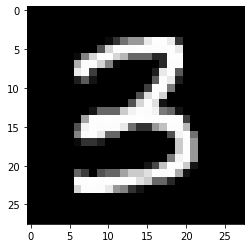

index: 5382
Lable: 2


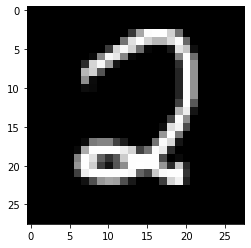

index: 1637
Lable: 0


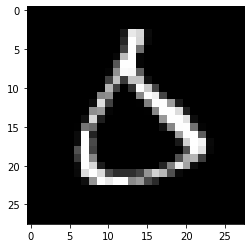

index: 2742
Lable: 5


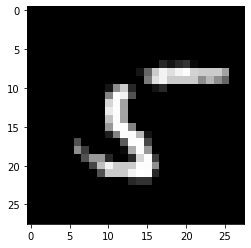

index: 3092
Lable: 7


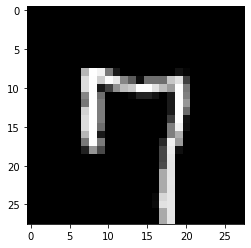

___________________


Randomly printing 10 images with labels from testing dataset
index: 825
Lable: 0


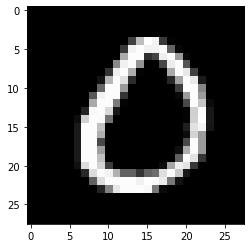

index: 769
Lable: 1


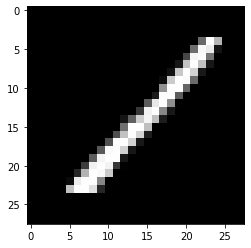

index: 216
Lable: 6


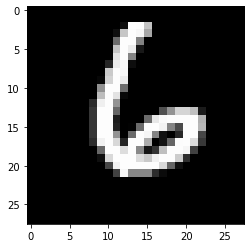

index: 622
Lable: 9


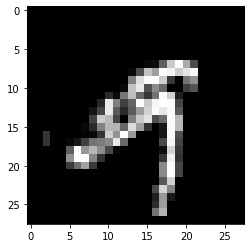

index: 469
Lable: 1


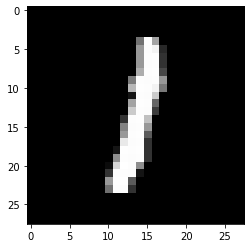

index: 609
Lable: 2


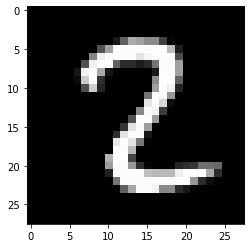

index: 648
Lable: 1


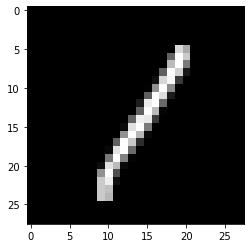

index: 22
Lable: 2


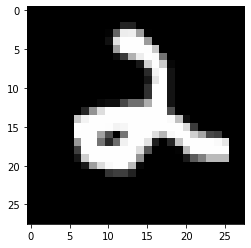

index: 248
Lable: 1


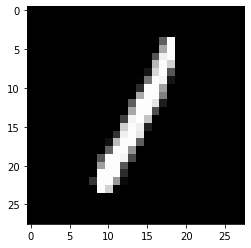

index: 97
Lable: 3


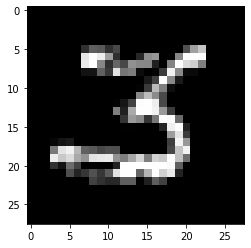

___________________




In [31]:
# Checking the shape of first image in new training dataset
print(dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(reduced_train_labels)),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(reduced_train_labels))
print("There are", len(set(reduced_test_labels)),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(reduced_test_labels))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels((reduced_train_images, reduced_train_labels))
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels((reduced_test_images, reduced_test_labels))
print("___________________\n\n")